Открываем датасет, заменяем символ пропусков '?'

In [1]:
import pandas as pd
df = pd.read_csv('adult.csv',na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Наблюдаем пропуски в колонках workclass, occupation, native-country. Более-менее достоверно предположить эти значения мы не можем. Замена пропусков какими-либо значащими величинами приведет к искажению статистики. Удаляем.

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


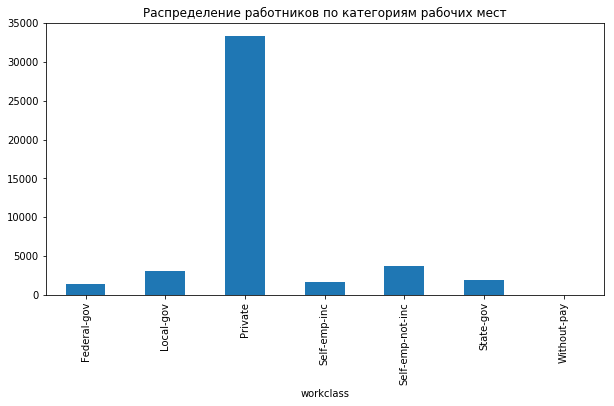

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,5])
df.groupby('workclass')['workclass'].count().plot(kind="bar")
plt.title("Распределение работников по категориям рабочих мест")

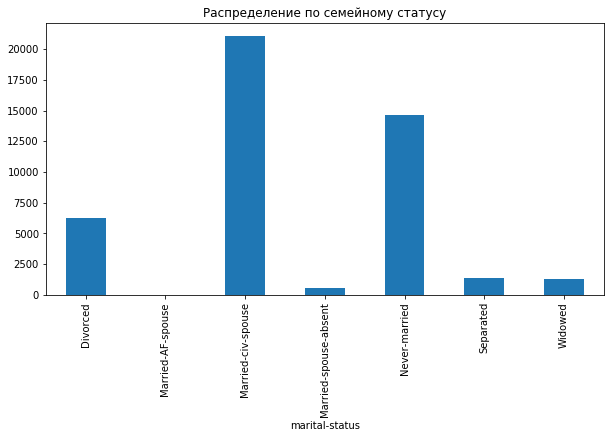

In [5]:
plt.figure(figsize=[10,5])
df.groupby('marital-status')['marital-status'].count().plot(kind="bar")
plt.title("Распределение по семейному статусу")

Преобразуем значения категориальных переменных в числа

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
df[col] = df[col].apply(le.fit_transform)

In [8]:
 df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


Делим датасет на зависимую и независимые переменные

In [23]:
X = df.iloc[:,:-1]
y= df['income']

Выполняем стандартизацию признаков

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.02498291, -0.2134431 ,  0.35088942, ..., -0.21878026,
        -0.07812006,  0.26299899],
       [-0.04145504, -0.2134431 , -0.94587846, ..., -0.21878026,
         0.7547014 ,  0.26299899],
       [-0.79801494, -1.25716323,  1.39359159, ..., -0.21878026,
        -0.07812006,  0.26299899],
       ..., 
       [ 1.47166476, -0.2134431 , -0.35805983, ..., -0.21878026,
        -0.07812006,  0.26299899],
       [-1.25195088, -0.2134431 ,  0.11127873, ..., -0.21878026,
        -1.74376299,  0.26299899],
       [ 1.01772882,  0.83027703,  0.92951628, ..., -0.21878026,
        -0.07812006,  0.26299899]])

Делим выборку на обучающую и тестовую

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
Обучаем модель логистической регрессии

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

Проверяем точность предсказания для обучающей и тестовой выборки

In [28]:
lr.score(X_train, y_train)

0.82005141388174807

In [29]:
lr.score(X_test,y_test)

0.82200110558319517

Обучаем модель SVM

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
Проверяем точность предсказания

In [31]:
svc.score(X_train, y_train)

0.85253061337313762

In [32]:
svc.score(X_test, y_test)

0.84632393587617472

Выводы.
В процессе выполнения работы данные загружены в датафрейм, из них удалены пропуски, преобразованы категориальные переменные, из датасета выделены признаки, выполнена их стандартизация, данные разделены на обучающую и тестовую выборки. На этих выборках обучены модели логистической регрессии и опорных векторов. 
Обе модели показали хороший результат, но метод опорных векторов дал более высокое качество классификации (85% против 82%). При этом метод опорных векторов работает значительно медленнее.
Для улучшения моделей можно попробовать сделать следующее:
1.) Выполнить преобразования категориальных переменных с помощью пандасовского метода get_dummies. С другой стороны, это увеличит размеры датасета и снизит скорость его обработки.
2.) Для логистической регрессии  - изменяя параметр регуляризации С, найти максимальное значение score (например, с помощью LogisticRegressionCV).
3.) Для метода опорных векторов можно также менять параметр регуляризации. Кроме того, можно попробовать заменить ядро (kernel).